#### Data_Hälso_förjupning.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import warnings



np.random.seed(42)
plt.style.use('seaborn-v0_8')
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv("statistics_health.csv")
print(df.head())
print(df.info())

    Unnamed: 0  mean  median  min  max
0          age   NaN     NaN  NaN  NaN
1       weight   NaN     NaN  NaN  NaN
2       height   NaN     NaN  NaN  NaN
3  systolic_bp   NaN     NaN  NaN  NaN
4  cholesterol   NaN     NaN  NaN  NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      object 
 1   mean        0 non-null      float64
 2   median      0 non-null      float64
 3   min         0 non-null      float64
 4   max         0 non-null      float64
dtypes: float64(4), object(1)
memory usage: 332.0+ bytes
None


#### Delar från Del1

In [ ]:
def visa_statistik(df):

    kolumner = ["age", "systolic_bp", "cholesterol", "weight" ]
    for kol in kolumner:
        print(f"{kol}: medel={df[kol].mean():.f}, median={df[kol].median():.f}")

    kolumner = ["age", "weight", "height", "systolic_bp", "cholesterol"]
    stats_df = pd.DataFrame(columns=["mean", "median", "min", "max"], index=kolumner)

    for col in kolumner:
        col_vals =df[col].dropna()
        stats_df.loc[col] = [
        col_vals.mean(),
        col_vals.median(),
        col_vals.min(),
        col_vals.max()
        ]

stats_df.to_csv("statistics_health.csv")
print("statistics_health.csv skapad.")


def skapa_grafer(df):
    fig, axs = plt.Subplots(2, 2, figsize=(12, 8))


    num_kol = ["age", "weight", "systolic_pb", "cholesterol" ]
    sns.heatmap(df[num_kol].corr(),annot=True, ax=axs[0,0])

    axs[0,1].scatter(df["age"], df["systolic_pb"], alpha=0.5)
    axs[0,1].set_title("Ålder vs Blodtryck")
    axs[0,1].boxplot([df[df["sex"]=="M"]["systolick_pb"],
                    df[df["sex"]=="F"]["systolic_pb"]],
                    labels=["Män", "Kvinnor"])
    
    sjukdom_per_kön = df.groupby("sex")["disease"].mean() * 100
    axs[1,1].bar("sjuk_per_kön.index, sjuk_per_kön.values")
        
        
    data = [df[df['sex'] == 'M']['systolic_bp']dropna(), df[df['sex'] == 'F'] ['systolic_bp']dropna()]

plt.figure(figsize=(7, 5))

plt.tight_layout()
plt.show()

visa_statistik(df)
skapa_grafer(df)
    

SyntaxError: invalid syntax. Perhaps you forgot a comma? (248090712.py, line 40)

#### Klasser:

In [47]:
class HealsAnalyz:

    def __init__(self, data):
        self.data = data

    def sammanfattning(self):
        return{
            "antal": len(self.data),
            "antal_sjuk": self.data["disease"].mean() * 100,
            "medelålder": self.data["age"].mean()
        }
    
    def regression(self, x_kol, y_kol):
        x = self.data[[x_kol]] if isinstance(x_kol, str) else self.data[x_kol]
        y =self.data[y_kol]

        
        model = LinearRegression()
        model.fit(x, y)

        return {
            "r2": model.score(x, y),
            "koeff": model.coef_,
            "intercept": model.intercept_
        }
   
analysator = HealsAnalyz(df)
print("sammanfattning:")
for nyckel, värde in analysator.sammanfattning().items():
        print(f"{nyckel}: {värde}")


sammanfattning:


KeyError: 'disease'

#### Linjer algebra - Regression:

In [ ]:
print("\nREGRESSION ANALYS:")

reg1 = analysator.regression('age', 'systolic_bp')
print(f"Ålder -> Blodtryck: R² = {reg1['r2']:.3f}")

reg2 = analysator.regression(['age', 'weight'], 'systolic_bp')
print(f"Ålder + Vikt -> Blodtryck: R² = {reg2['r2']:.3f}")

model


REGRESSION ANALYS:


KeyError: "None of [Index(['age'], dtype='object')] are in the [columns]"

#### Linjer Algebra - PCA:


PCA ANALYS: 
PC1 förklarar 54.2% av variansen
PC2 förlkarar 33.9% av variansen
Totalt: 88.2% av variansen


<function matplotlib.pyplot.show(close=None, block=None)>

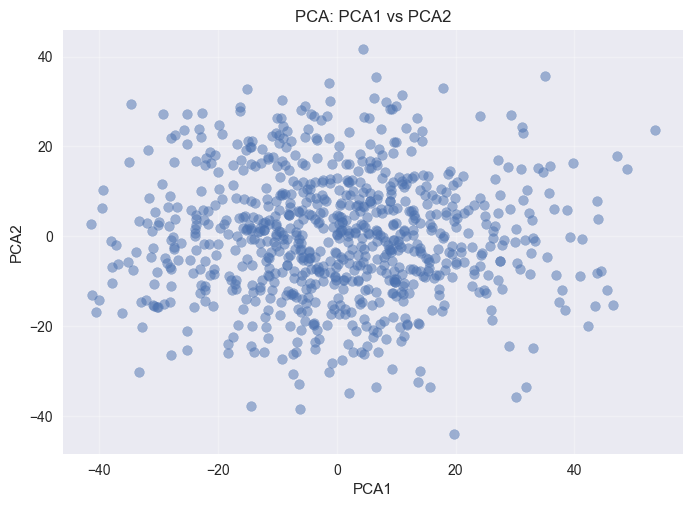

In [ ]:
print("\nPCA ANALYS: ")
from sklearn.decomposition import PCA


num_data = df[['age', 'systolic_bp', 'cholesterol', 'weight']].dropna()

pca =PCA(n_components=2)
pca_result = pca.fit_transform(num_data)

print(f"PC1 förklarar {pca.explained_variance_ratio_[0]*100:.1f}% av variansen")
print(f"PC2 förlkarar {pca.explained_variance_ratio_[1]*100:.1f}% av variansen")
print(f"Totalt: {sum(pca.explained_variance_ratio_) * 100:.1f}% av variansen")

plt.Figure(figsize=(7, 5))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA: PCA1 vs PCA2')
plt.grid(True, alpha=0.3)
plt.show


Utökad Analys:

In [ ]:
print("\nUTÖKAD ANALYS:")
df['åldersgräns'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['<40', '40-60', '60+'])
sjuk_per_ålder = df.groupby('åldersgräns')['disease'].mean() * 100
print("sjukdomrisk per ålder: ")

for ålder, risk in sjuk_per_ålder.items():
    print(f" {ålder}: {risk:.1f}%")

    bp_män = df[df['sex']=='M']['systolic_bp'].mean()
    bp_kvinnor = df[df['sex']=='F']['systolic_bp'].mean()
    print(f'\nBlodtryck: män={bp_män:.1f}, kvinnor={bp_kvinnor:.1f}')

    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))


    ax1.bar(sjuk_per_ålder.index.astype(str), sjuk_per_ålder.values)
    ax1.set_title('sjukdomsrisk per ålder')
    ax1.set_ylabel('Risk (%)')

    ax2.boxplot(
                 df[df['disease'] == 0]['vikt'], 
                df[df['disease'] == 1]['vikt'], 
                 labels=['Frisk', 'Sjuk'])
    ax2.set_title('Vikt för sjuka och friska')

    plt.tight_layout()
    plt.show()
    


UTÖKAD ANALYS:


KeyError: 'age'